# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/installation.md) before you start.

# Imports

In [72]:
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

## Env setup

In [73]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [74]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [75]:

CKPT = 'IG/naive_1024/frozen_inference_graph.pb'

PATH_TO_LABELS = 'label.pbtxt'

NUM_CLASSES = 49

## Load a (frozen) Tensorflow model into memory.

In [76]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  od_graph_def = tf.GraphDef()

  with tf.gfile.GFile(CKPT, 'rb') as fid:
        
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [77]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'name': 'pn', 'id': 1}, 2: {'name': 'pne', 'id': 2}, 3: {'name': 'i5', 'id': 3}, 4: {'name': 'p11', 'id': 4}, 5: {'name': 'pl40', 'id': 5}, 6: {'name': 'po', 'id': 6}, 7: {'name': 'pl50', 'id': 7}, 8: {'name': 'pl80', 'id': 8}, 9: {'name': 'io', 'id': 9}, 10: {'name': 'pl60', 'id': 10}, 11: {'name': 'p26', 'id': 11}, 12: {'name': 'i4', 'id': 12}, 13: {'name': 'pl100', 'id': 13}, 14: {'name': 'pl30', 'id': 14}, 15: {'name': 'il60', 'id': 15}, 16: {'name': 'p15', 'id': 16}, 17: {'name': 'i2', 'id': 17}, 18: {'name': 'w57', 'id': 18}, 19: {'name': 'p5', 'id': 19}, 20: {'name': 'p10', 'id': 20}, 21: {'name': 'ip', 'id': 21}, 22: {'name': 'pl120', 'id': 22}, 23: {'name': 'il80', 'id': 23}, 24: {'name': 'p23', 'id': 24}, 25: {'name': 'pr40', 'id': 25}, 26: {'name': 'ph4.5', 'id': 26}, 27: {'name': 'w59', 'id': 27}, 28: {'name': 'p12', 'id': 28}, 29: {'name': 'p3', 'id': 29}, 30: {'name': 'w55', 'id': 30}, 31: {'name': 'pm20', 'id': 31}, 32: {'name': 'pl20', 'id': 32}, 33: {'name': 'pg',

## Helper code

In [78]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [79]:
from glob import glob

In [80]:

PATH_TO_TEST_IMAGES_DIR = 'test/tt100k/resized/'

#print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
#TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))  # PNG OR JPG
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

Length of test images: 24


Time in milliseconds 7299.708843231201


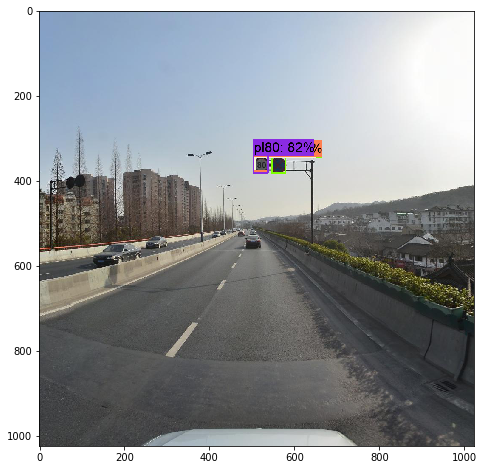

[[580, 547, 380, 344, 0.9982205, 1], [539, 504, 380, 340, 0.8225478, 8]]
Time in milliseconds 3185.343027114868


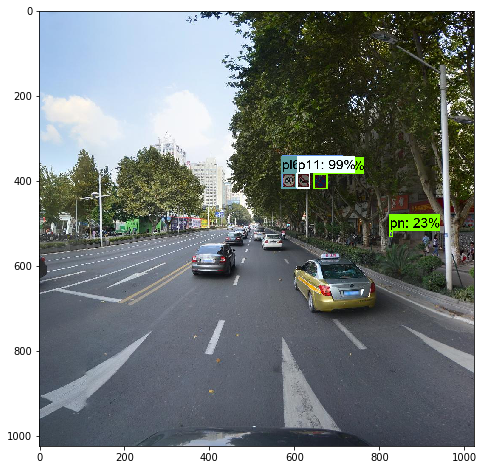

[[678, 646, 417, 383, 0.9995459, 1], [605, 570, 415, 381, 0.9051253, 10], [637, 607, 415, 381, 0.99782556, 4]]
Time in milliseconds 14634.435415267944


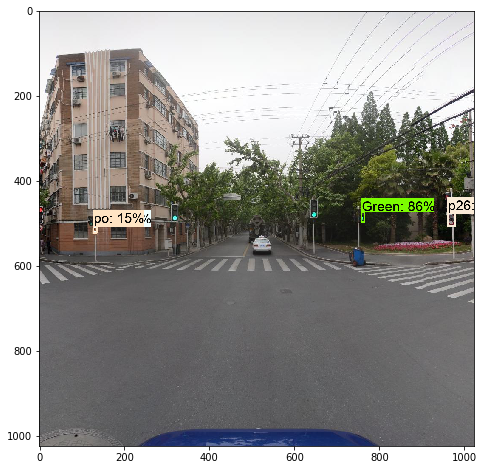

[[766, 758, 495, 473, 0.86163354, 48], [980, 961, 505, 477, 0.809119, 11]]
Time in milliseconds 16681.796312332153


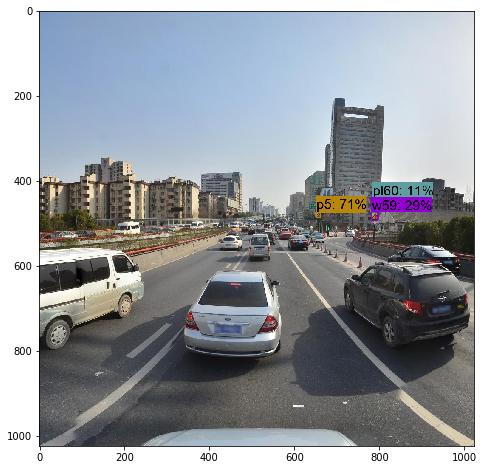

[[801, 784, 460, 442, 0.96726704, 14], [663, 651, 485, 474, 0.71961933, 19]]
Time in milliseconds 6275.689363479614


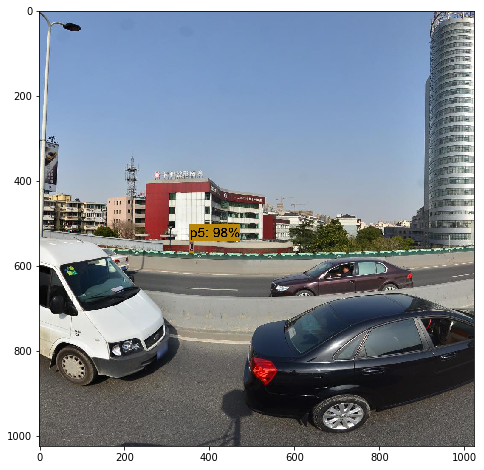

[[364, 353, 566, 541, 0.9881394, 19]]
Time in milliseconds 2739.905595779419


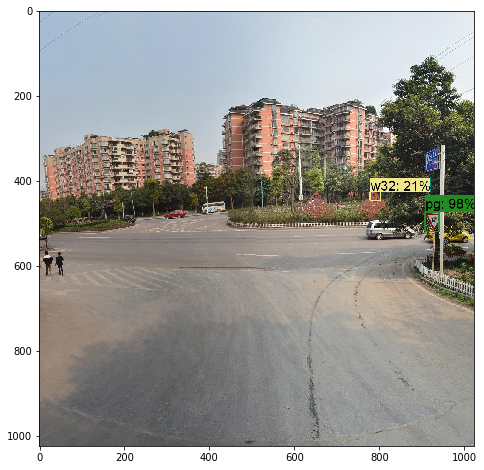

[[941, 908, 518, 473, 0.9819224, 33]]
Time in milliseconds 3814.366340637207


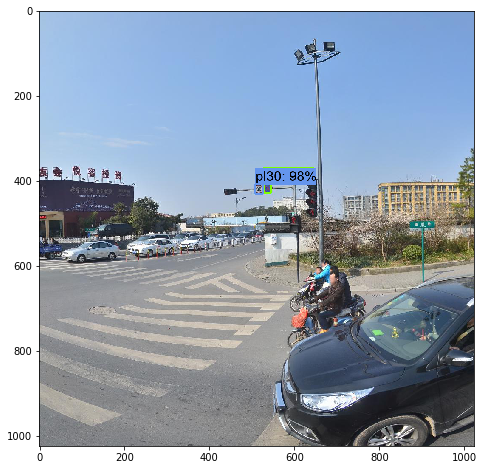

[[546, 528, 428, 407, 0.99656576, 1], [527, 508, 430, 408, 0.98366183, 14]]
Time in milliseconds 2778.4934043884277


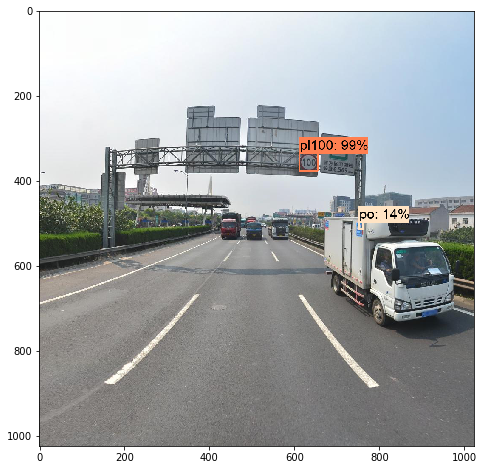

[[656, 612, 375, 335, 0.9982146, 13]]
Time in milliseconds 1889.6653652191162


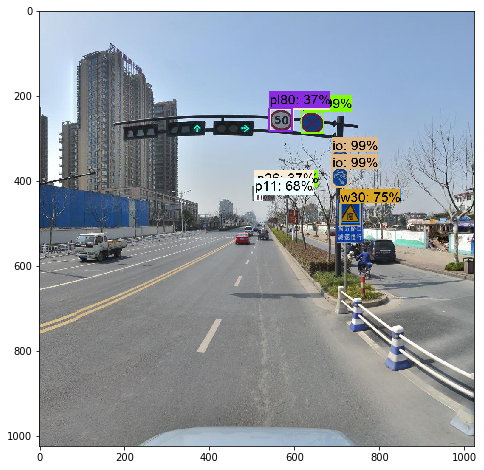

[[757, 708, 504, 452, 0.7573665, 38], [670, 617, 287, 237, 0.9992434, 1], [728, 689, 370, 330, 0.9918224, 9], [520, 506, 427, 413, 0.8759042, 11], [598, 542, 280, 231, 0.85566634, 7], [727, 689, 414, 370, 0.9960024, 9], [552, 538, 426, 413, 0.9036817, 1], [521, 506, 445, 431, 0.6851286, 4]]
Time in milliseconds 16578.181266784668


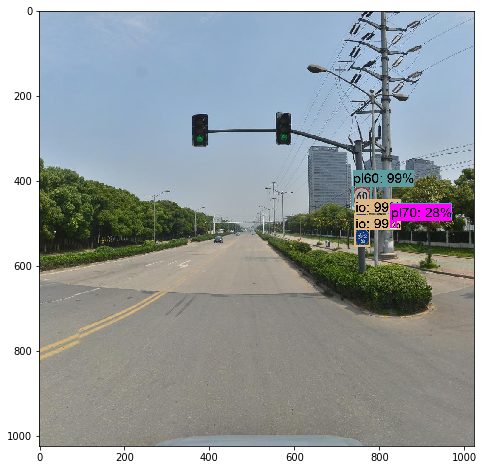

[[782, 738, 459, 413, 0.9999254, 10], [776, 743, 512, 475, 0.9992015, 9], [778, 743, 553, 514, 0.9996214, 9]]
Time in milliseconds 16871.243238449097


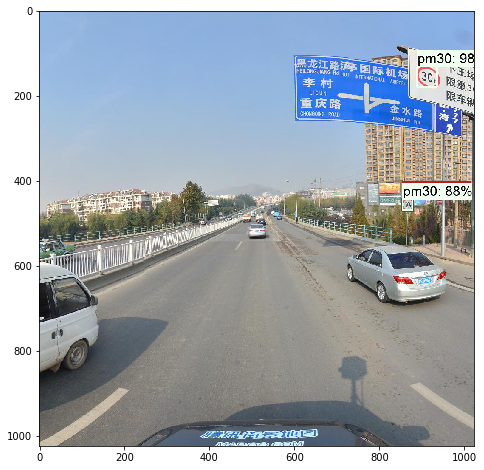

[[937, 889, 178, 131, 0.98402816, 41], [879, 855, 468, 443, 0.88094187, 41]]
Time in milliseconds 16405.28893470764


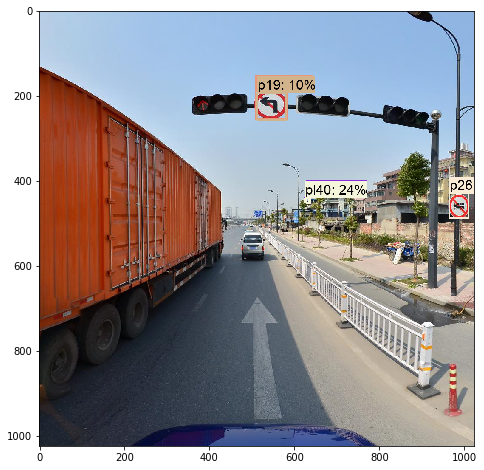

[[1011, 965, 487, 429, 0.97953343, 11], [584, 509, 253, 189, 0.9628268, 24]]
Time in milliseconds 16895.473957061768


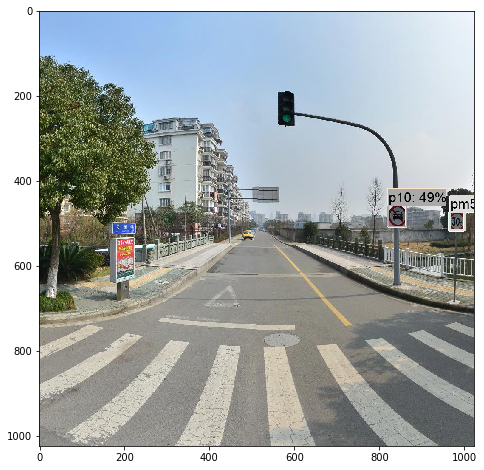

[[999, 964, 518, 474, 0.96074396, 41]]
Time in milliseconds 16560.009241104126


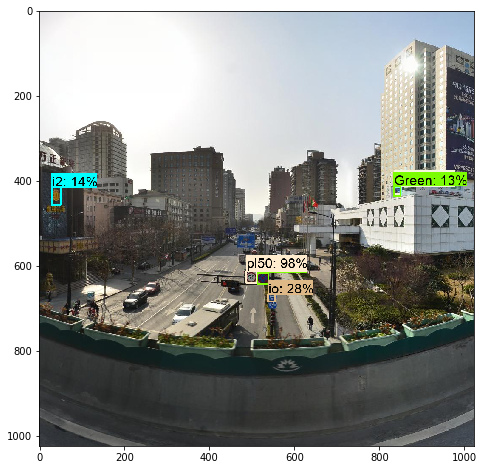

[[540, 513, 641, 616, 0.99694127, 1], [512, 487, 639, 613, 0.9877698, 7]]
Time in milliseconds 4390.39158821106


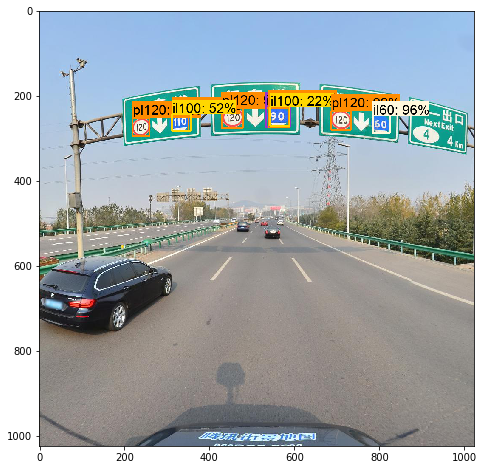

[[352, 312, 282, 241, 0.66307056, 22], [480, 429, 275, 229, 0.9978976, 22], [260, 219, 293, 252, 0.9696007, 22], [589, 539, 273, 225, 0.7590673, 22], [734, 687, 279, 235, 0.995915, 22], [357, 312, 282, 242, 0.5205235, 37], [826, 785, 287, 246, 0.96184766, 15]]
Time in milliseconds 2828.6044597625732


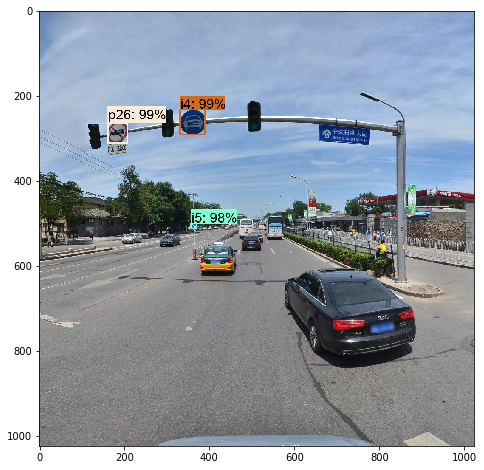

[[390, 331, 290, 232, 0.9995022, 12], [371, 357, 511, 500, 0.98547137, 3], [208, 161, 310, 263, 0.9950153, 11]]
Time in milliseconds 2715.3468132019043


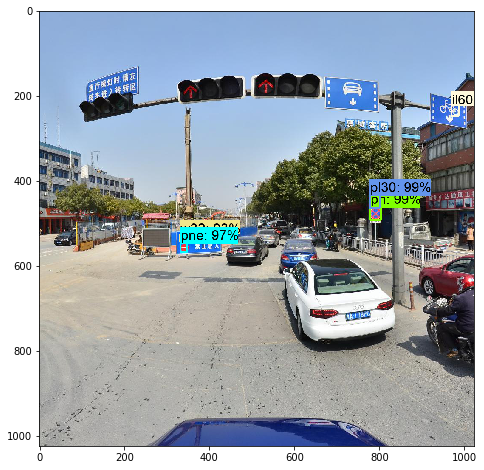

[[805, 779, 491, 462, 0.9998281, 1], [348, 331, 543, 525, 0.938238, 45], [349, 332, 567, 547, 0.97206277, 2], [802, 778, 462, 434, 0.99227047, 14]]
Time in milliseconds 3124.958038330078


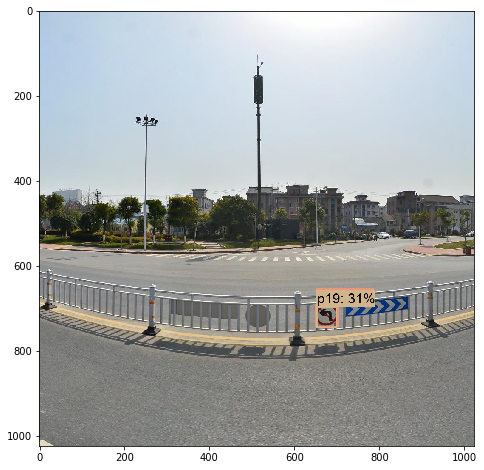

[[704, 651, 742, 691, 0.8435098, 24]]
Time in milliseconds 13406.672477722168


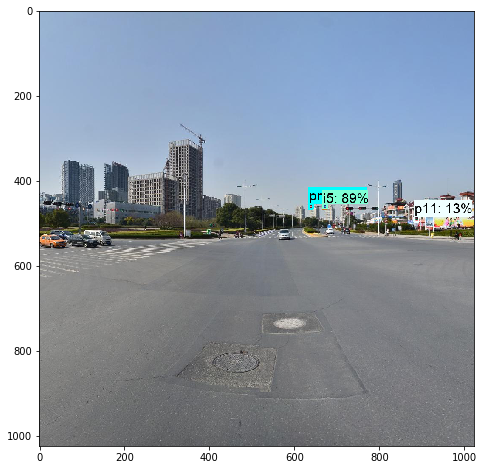

[[645, 634, 465, 454, 0.9991173, 2], [678, 667, 464, 454, 0.8952074, 3]]
Time in milliseconds 13868.071794509888


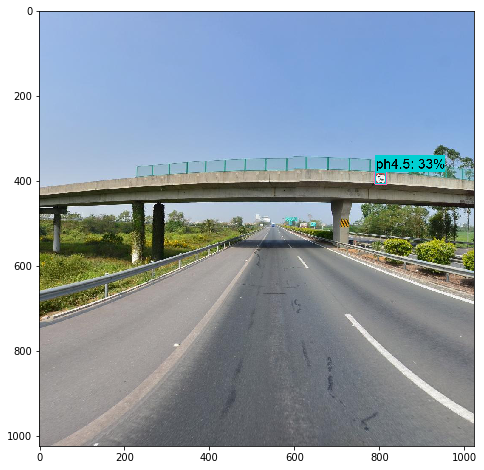

[[818, 790, 406, 379, 0.710691, 42]]
Time in milliseconds 3307.809352874756


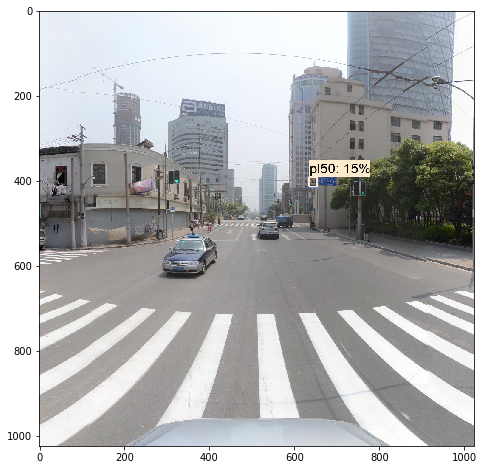

[[655, 635, 413, 389, 0.91812825, 14]]
Time in milliseconds 2409.7793102264404


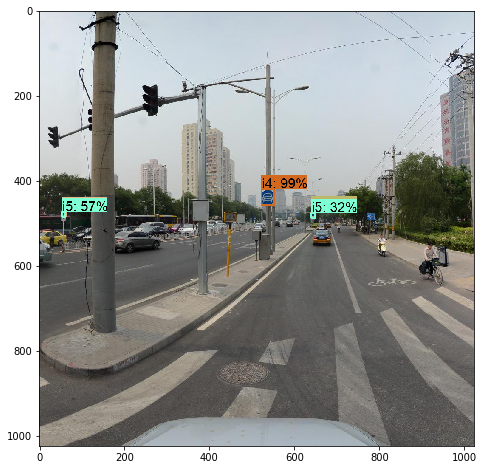

[[554, 523, 456, 419, 0.99996257, 12], [62, 53, 484, 473, 0.57283694, 3]]


In [ ]:
import time

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            print("Time in milliseconds", (time1 - time0) * 1000) 

            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              min_score_thresh=0.1,
              line_thickness=4)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            coordinates = vis_util.return_coordinates(
                        image,
                        np.squeeze(boxes),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),
                        category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8,
                        min_score_thresh=0.50)
            print(coordinates)
            